In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tessreduce as tr
from tessts_funcs import *
%matplotlib notebook

In [2]:
obs = tr.spacetime_lookup(ra=348.786,dec=-45.328,time=58337)

|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|        1 | True     |                  0 |
|        2 | False    |                 15 |
|       28 | False    |                723 |
|       68 | False    |               1817 |


getting TPF from TESScut
made reference
7
made source mask
calculating background
background subtracted
calculating centroids


<IPython.core.display.Javascript object>


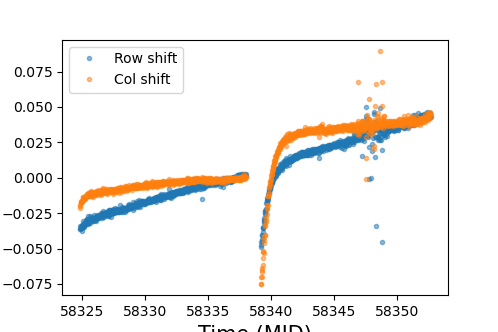

!!Re-running for difference image!!
shifting images
7
remade mask
background
Background correlation correction
Field calibration
Target is below -30 dec, calibrating to SkyMapper photometry.


<IPython.core.display.Javascript object>


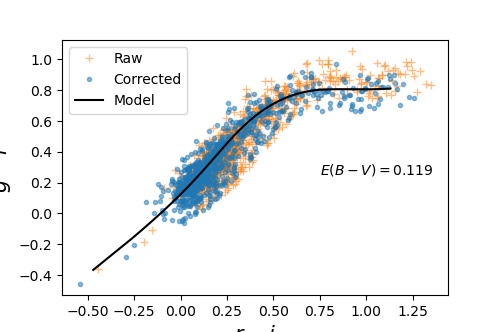

<IPython.core.display.Javascript object>


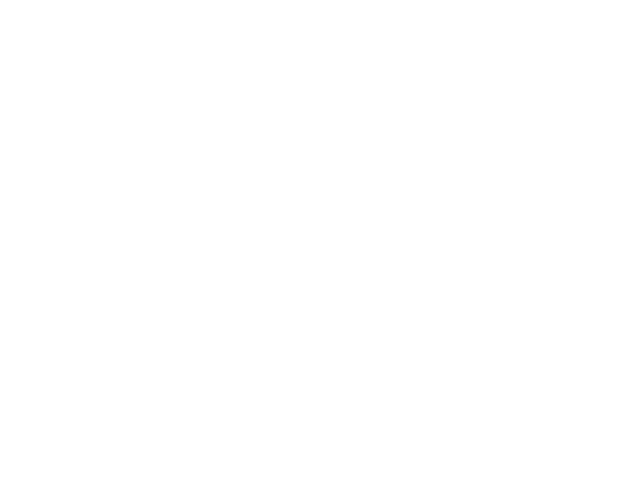

<IPython.core.display.Javascript object>


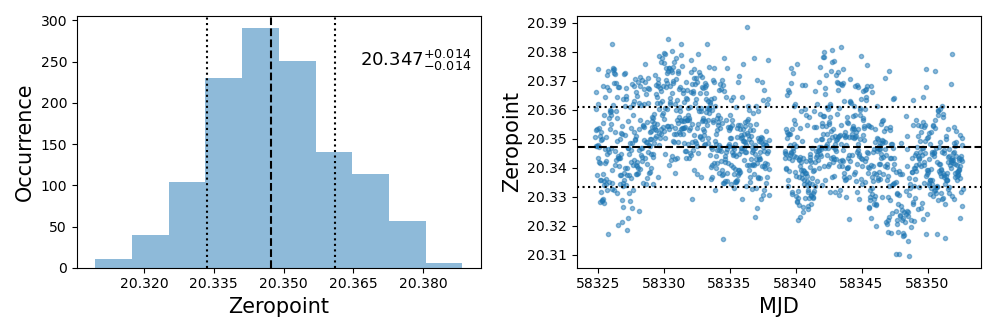

<IPython.core.display.Javascript object>


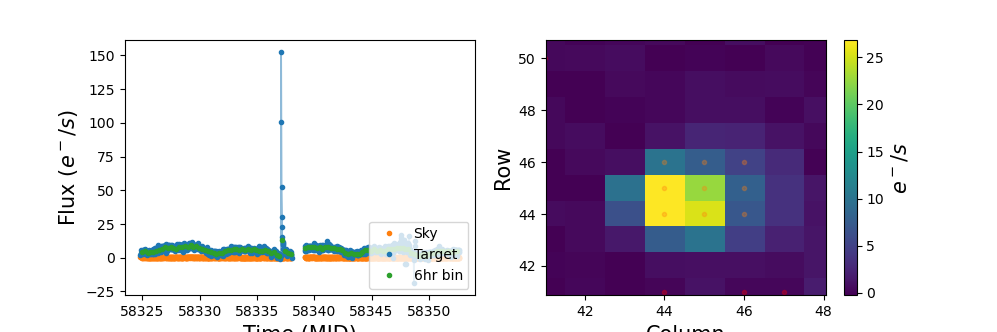

In [3]:
t = tr.tessreduce(obs_list=obs,reduce=True,plot=True)

<IPython.core.display.Javascript object>


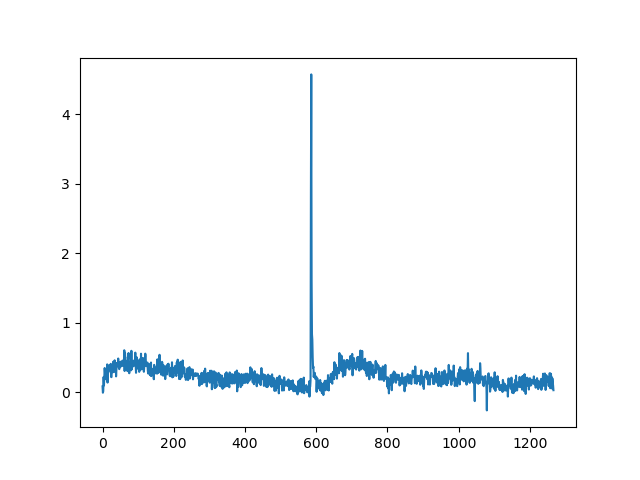

In [10]:
from astropy.stats import sigma_clip
from copy import deepcopy

In [11]:
ind = sigma_clip(t.flux,masked=True).mask

In [12]:
f = deepcopy(t.flux)
f[ind] = np.nan
med = np.nanmedian(f,axis=0)
std = np.nanstd(f,axis=0)

In [13]:
sig = t.flux /(med + 10*std)

<IPython.core.display.Javascript object>


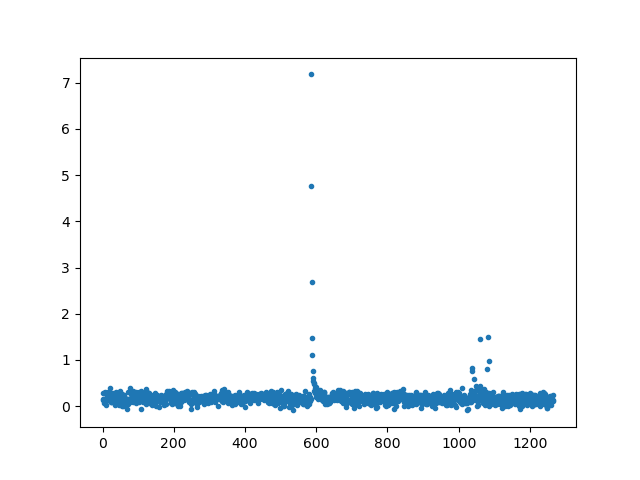

In [30]:
plt.figure()
plt.plot(sig[:,44,44],'.')

In [23]:
events, eventtime, eventmask = Event_ID(sig,1,3)
events, eventtime, eventmask = Match_events(events,eventtime,eventmask)

There is a LOT of junk picked up with this method. For now we can isolate this down to the target of interest by finding which event contains the central pixel

In [48]:
for i in range(len(eventmask)):
    x,y = eventmask[i]
    if (45 in x) & (45 in y):
        print(i)

45


Number of events:  1


<IPython.core.display.Javascript object>


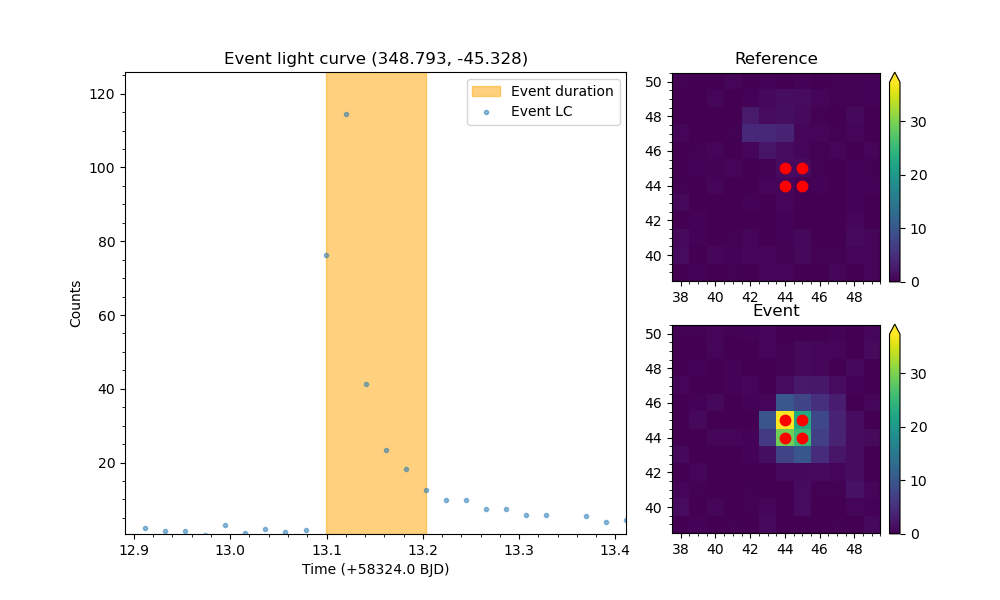

In [49]:
i = 10
TESS_Fig(events[45:46],eventtime[45:46],eventmask[45:46],t.flux,t.lc[0],t.tpf.wcs)

## Example of the PRF
https://github.com/keatonb/TESS_PRF

In [37]:
! pip install TESS_PRF # only use once

  Preparing metadata (setup.py) ... done
  Created wheel for TESS_PRF: filename=TESS_PRF-0.1.3-py3-none-any.whl size=6904 sha256=49ad1a4cbdd4cfe8c878bea9fff59580324c06accfaa023774eabc2b5e55ce44
  Stored in directory: /Users/rri38/Library/Caches/pip/wheels/99/30/41/ffe731e49f8582c1e26c3b1718075dbb20b3bd338611761499
Successfully built TESS_PRF


In [38]:
import PRF

In [40]:
t.tpf.column

222

In [46]:
prf = PRF.TESS_PRF(t.tpf.camera,t.tpf.ccd,t.tpf.sector,t.tpf.column,t.tpf.row)
resampled = prf.locate(5.0, 5.0, (11,11))

<IPython.core.display.Javascript object>


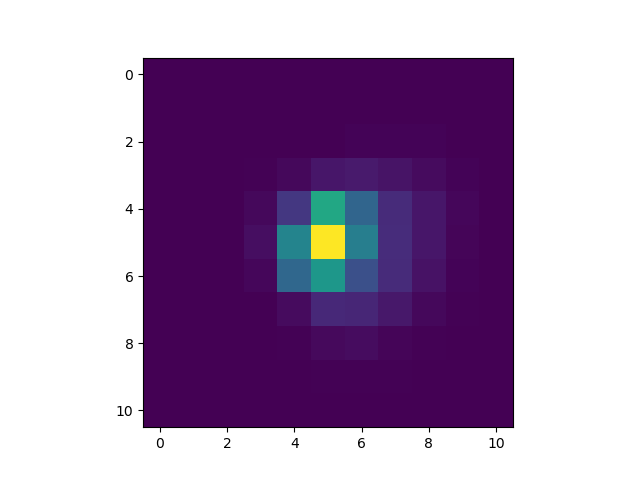

In [47]:
plt.figure()
plt.imshow(resampled)
